In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
string.punctuation
from datetime import timedelta
import numpy as np
import nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project\\"
dir_ = "C:/Users/zalian2/OneDrive - University of Illinois - Urbana/UIUC/Spring 2024/ACE 592 SAE/ACE_592_Project/"

In [3]:
df = pd.read_csv(dir_+"updated_drug_reviews_cleaned.csv")


In [5]:
df

,Text,Rating,Drug,cleaned_review
0,I started ozempic 9 months ago. At the time I ...,10.0,Ozempic,I started ozempic 9 months ago. At the time I ...
1,I did one injection and have been ill since.\r...,1.0,Ozempic,I did one injection and have been ill since. H...
2,I’ve been Ozempic for 4 weeks. I am so glad t...,10.0,Ozempic,Ive been Ozempic for 4 weeks. I am so glad tha...
3,"Started on Ozempic Sept 2020, starting weight ...",10.0,Ozempic,"Started on Ozempic Sept 2020, starting weight ..."
4,I took one Ozempic injection at .25 and ended ...,1.0,Ozempic,I took one Ozempic injection at .25 and ended ...
...,...,...,...,...
745,"I have been on Jardiance for 2 years, as my do...",1.0,Jardiance,"I have been on Jardiance for 2 years, as my do..."
746,I get it everyone is different but I will shar...,1.0,Jardiance,I get it everyone is different but I will shar...
747,Disgusting experience. Urinating one and a hal...,3.0,Jardiance,Disgusting experience. Urinating one and a hal...
748,I've been on Jardiance in combination with met...,NaN,Jardiance,I've been on Jardiance in combination with met...


In [6]:
## I want to 'trim' the the text columns. For example if the value for the drug column is 'Tirzepatide ', I want it to be 'Tirzepatide'
df['Drug'] = df['Drug'].str.strip()
df['cleaned_review'] = df['cleaned_review'].str.strip()


## Creating a column for sentiment scores
sid = SentimentIntensityAnalyzer()
df['sentiment'] = [sid.polarity_scores(x)['compound'] for x in df.cleaned_review]

## Getting average sentiment per drug
import statistics
from statistics import mean
for x in df['Drug'].unique():
    print("Average sentiment score for the drug ", x, 'is:',statistics.mean(df[df['Drug']==x].sentiment))

Average sentiment score for the drug  Ozempic is: -0.1537176
Average sentiment score for the drug  Sitagliptin is: -0.2973976
Average sentiment score for the drug  Mounjaro is: -0.1175864
Average sentiment score for the drug  Rybelsus is: -0.0889928
Average sentiment score for the drug  Victoza is: 0.13205999999999998
Average sentiment score for the drug  Jardiance is: -0.08390399999999999


<Axes: title={'center': "Sentiment scores of Diabetes drugs' user reviews"}, xlabel='Drug', ylabel='Sentiment score'>

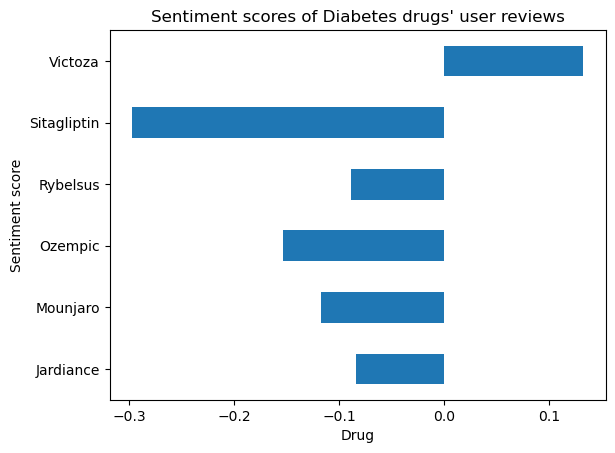

In [7]:
## Creating a chart of the average sentiment of each drug
df.groupby('Drug')['sentiment'].mean().plot(kind='barh', xlabel='Drug', ylabel='Sentiment score',
                                           title="Sentiment scores of Diabetes drugs' user reviews")

**Victoza is the only drug with a positive average of sentiment score. All other drugs in our sample have negative scores with Sitaglptin having the lowest. This is probably due to the fact that users state their symptoms when reviewing the drugs. For example, they could mention that they suffer from pain and diarrhea, so that is why they are taking the drug.**

In [8]:
# Creating a function that will remove punctuation
remv_punc = str.maketrans('','',string.punctuation)

In [9]:
# Make the text lowercase
df['lower_text'] =  df['cleaned_review'].str.lower()

In [10]:
remv_punc = str.maketrans('','',string.punctuation + '“' +"‘"+'”')
# Remove the punctuation
df['lower_text_NoPunct'] = df['cleaned_review'].str.translate(remv_punc)

In [11]:

# Download the stopwords, but add another list with "amp", "", and white space " "
sw_list = stopwords.words('english') + ['amp',''," "]

In [12]:
# split on whitespace to get separate words
df['words'] = [x.split(" ") for x in df['lower_text_NoPunct']]

In [13]:
# Take out stopwords
# Convert the text to a set, subtract the set of stopwords, turn into list
df['words'] = [list(set(x) - set(sw_list)) for x in df['words']]

In [14]:
# Creating an instance of the CountVectorizer with a stop word list.
vct = CountVectorizer(stop_words=sw_list)
# Gives me an output of word counts 
X = vct.fit_transform(list(df['lower_text_NoPunct']))

In [15]:
# make X a dataframe
word_counts = pd.DataFrame(X.sum(axis=0))

In [16]:
word_counts

,0,1,2,3,4,5,6,7,8,9,...,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772
0,1,1,1,19,4,1,16,4,1,19,...,1,11,2,3,9,1,19,10,4,2


In [17]:
# Assign to columns a list of the feature names from .get_feature_names_out()
word_counts.columns = vct.get_feature_names_out()
# Transpose, so that word labels are rows instead of columns
word_counts = word_counts.T

In [18]:
words =  word_counts[0].index

In [19]:
# Look at the first column (0), sort the values, give me the first 20.
word_counts[0].sort_values(ascending=False).head(20)

side          410
started       396
weight        375
effects       349
taking        338
lost          324
im            319
blood         293
months        284
a1c           277
day           271
weeks         269
sugar         262
ive           251
first         250
nausea        242
eat           239
days          237
medication    233
week          212
Name: 0, dtype: int64

In [20]:
data = pd.DataFrame(X.toarray(), \
                 columns=word_counts.index)

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
model = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())

In [22]:
data['sentiment'] = df[['sentiment']]

In [23]:
word_counts.reset_index(inplace=True)
word_counts.rename(columns = {'index' : 'Words', 0 : 'Count'}, inplace=True)

In [24]:
word_counts = word_counts.pivot_table(index=None, columns='Words', values='Count', aggfunc='first', fill_value=0)

In [25]:
data

,01032020,011723,02,025,025mg,03,05,050,05mg,06,...,youre,youve,yr,yrs,yuck,zero,zofran,zombie,zone,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.9453
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.7227
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.7257
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.9359
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.6931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.7535
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.2475
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.8558
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.4394
